# Dow Jones

In this Ipython notebook, Based on the stock prices available for the past weeks, we try to predict the price we can expect in the next week. Specifically, we predict the percent change in stock price for the next week based on given attributes.

The dataset is available here:https://archive.ics.uci.edu/ml/machine-learning-databases/00312/

The below code cell includes importing the necessary modules for the functionality of the code and writes some basic helper functions required for further calculations

In [ ]:
## Preliminaries

#Show plots in the notebook
%matplotlib inline

from sklearn import datasets, preprocessing, cross_validation, feature_extraction
from sklearn import linear_model, svm, metrics, ensemble, neighbors, mixture, cluster
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
try:
    import urllib.request as urllib2
except ImportError:
    import urllib2
import random

from scipy.spatial import distance
import sys    
from scipy.spatial import distance
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
import time

# Helper functions
def folds_to_split(data,targets,train,test):
    data_tr = pd.DataFrame(data).iloc[train]
    data_te = pd.DataFrame(data).iloc[test]
    labels_tr = pd.DataFrame(targets).iloc[train]
    labels_te = pd.DataFrame(targets).iloc[test]
    return [data_tr, data_te, labels_tr, labels_te]

def computeLabelPercentage(data, axis=0):
    return data.groupby(by=axis).size().apply(lambda x: x/data.count())

Lets start with loading the data and understanding the dataset.
The Dow Jones data set consists of weekly stock price changes for 30 different companies listed on the Dow Jones index of USA. We have 25 weeks of data available for 30 companies. Each row in the data set represents weekly data for a certain company.
The data set also has 16 attributes. Determining the significant attributes which can be used for further calculation is an important step

In [93]:
#linear regression: predict the value of percent change next week based on that particular company's classifier only
#classificaion: generate a hyperplane using SVm to classify into profit or loss making shares
#clustering: 

#load data from the file
dow_df = pd.read_csv("dow_jones_index/dow_jones_index.data")

dow_df = dow_df.dropna()

print (dow_df.shape)

#dow_labels=dow_df.iloc[:,-3]
#dow_labels[dow_labels>0] = 1
#dow_labels[dow_labels<0] = 0
# 30 rows dropped

(720, 16)


In [ ]:
my_cols = ['quarter', 'stock', 'date', 'percent_change_price', 'percent_change_volume_over_last_wk', 'percent_return_next_dividend', 'percent_change_next_weeks_price']
my_dow_df = dow_df[my_cols]
my_dow_df = my_dow_df.dropna()
my_dow_df.index = pd.DatetimeIndex(my_dow_df['date'])
my_dow_df = my_dow_df.drop('date', axis=1)

In [89]:
dow_grouped = my_dow_df.groupby('stock')
stock_names = list(dow_grouped.groups.keys())
total_groups = dow_grouped.ngroups

In [90]:
print (total_groups)
print(my_dow_df.columns)
temp = pd.DataFrame(my_dow_df.groupby('stock').get_group(stock_names[0]))    
temp = temp.drop(temp.columns[[0, 1]], axis=1)
print(temp.shape)

30
Index(['quarter', 'stock', 'percent_change_price',
       'percent_change_volume_over_last_wk', 'percent_return_next_dividend',
       'percent_change_next_weeks_price'],
      dtype='object')
(24, 4)


In [77]:
x=time.time()
filename=[]
NewDF2= pd.DataFrame()
company_no = 0
ind = 0

#class loop, k = class
while company_no < total_groups:
    companyName = stock_names[company_no]
    NewDF2.loc[ind, 'stock'] = companyName
    temp = pd.DataFrame(dow_grouped.get_group(companyName))
    temp = temp.drop(temp.columns[[0, 1]], axis=1)
    throw, totalFeatures = temp.shape
    for col in range (0,totalFeatures,1):
        temp2 = pd.DataFrame(temp.iloc[:-1,col])
        arma=sm.tsa.ARMA(temp2.values, (1,0)).fit()
        NewDF2.loc[ind, col] = arma.params[1]
    ind += 1
    company_no += 1

print("Total time taken to extract all the features: ", int(time.time() - x), " s\n")
print (NewDF2.shape)

Total time taken to extract all the features:  5  s

(30, 5)


In [78]:
import time
x=time.time()
filename=[]
NewDFtest= pd.DataFrame()
company_no = 0
ind = 0

#class loop, k = class
while company_no < total_groups:
    companyName = stock_names[company_no]
    NewDFtest.loc[ind, 'stock'] = companyName
    temp = pd.DataFrame(dow_grouped.get_group(companyName))
    temp = temp.drop(temp.columns[[0, 1]], axis=1)
    throw, totalFeatures = temp.shape
    for col in range (0,totalFeatures,1):
        temp2 = pd.DataFrame(temp.iloc[:,col])
        arma=sm.tsa.ARMA(temp2.values, (1,0)).fit()
        NewDFtest.loc[ind, col] = arma.params[1]
    ind += 1
    company_no += 1

print("Total time taken to extract all the features: ", int(time.time() - x), " s\n")
print (NewDFtest.shape)

Total time taken to extract all the features:  6  s

(30, 5)


In [80]:
train_data = NewDF2.iloc[:,1:3]
train_label = NewDF2.iloc[:,4]
test_data = NewDFtest.iloc[:,1:3]
test_label = NewDFtest.iloc[:,4]

In [82]:
fold_results = pd.DataFrame()
foldnum = 0

lr = linear_model.LinearRegression()
lr.fit(train_data, train_label)
# We could print out our results
acc = lr.score(test_data, test_label)
mo = metrics.mean_squared_error(test_label, lr.predict(test_data))
print ("R^2 metric = %03.3f \t\t MSE = %03.1f " % (acc, mo))

# But a nicer way to store them is in a DataFrame
fold_results.loc[foldnum, 'R^2'] = acc
fold_results.loc[foldnum, 'MSE'] = mo
    
#Now let's look at the results:
print (fold_results)
#And compute the mean error across folds:
print (fold_results.mean())

R^2 metric = 0.784 		 MSE = 0.0 
        R^2       MSE
0  0.784088  0.008742
R^2    0.784088
MSE    0.008742
dtype: float64


In [95]:
my_cols = ['quarter', 'stock', 'date', 'percent_change_price', 'percent_change_volume_over_last_wk', 'percent_return_next_dividend', 'percent_change_next_weeks_price']
my_dow_df = dow_df[my_cols]
my_dow_df = my_dow_df.dropna()

In [100]:
print(trial2)

2011-01-16   -2.470660
2011-01-23    1.638310
2011-01-30    5.933250
2011-02-06    0.230814
2011-02-13   -0.632547
2011-02-20   -1.766780
2011-02-27   -1.368230
2011-03-06   -3.317250
2011-03-13    1.003130
2011-03-20    4.334550
2011-03-27    1.984820
2011-04-03    2.870260
2011-04-10   -8.527130
2011-04-17    3.728610
2011-04-24    0.354191
2011-05-01   -0.694847
2011-05-08   -0.349650
2011-05-15   -4.352940
2011-05-22    3.258150
2011-05-29   -4.841600
2011-06-05   -4.020100
2011-06-12   -3.727930
2011-06-19    3.817310
2011-06-26    7.161630
Freq: W-SUN, Name: percent_change_next_weeks_price, dtype: float64


/home/ankit/anaconda3/lib/python3.5/site-packages/statsmodels/base/data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


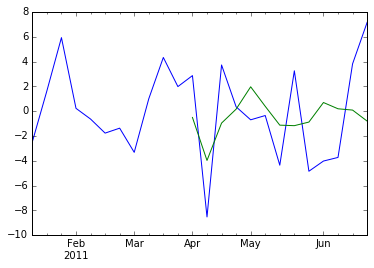

In [110]:
import statsmodels.api as sm

trial = my_dow_df.groupby('stock').get_group('AA')
trial2 = trial['percent_change_next_weeks_price']
trial2.index = pd.DatetimeIndex(trial['date'])  
trial2 = trial2.resample('W',how="mean")  
arma_mod20 = sm.tsa.ARMA(trial2, (4,1)).fit()

predicti = arma_mod20.predict('2011-04-03', '2011-06-26', dynamic=True)

trial2.plot()
predicti.plot()

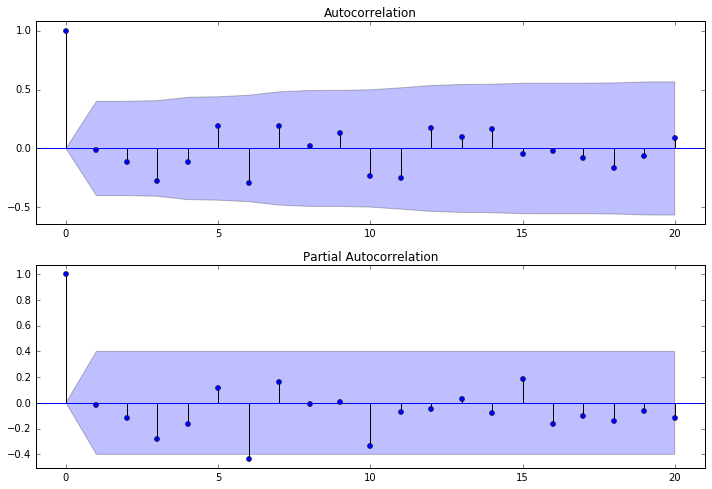

In [59]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(trial2.values.squeeze(), lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(trial2, lags=20, ax=ax2)

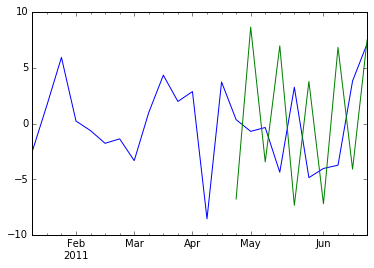

In [94]:
trial2.plot()
predicti.plot()

In [88]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

In [95]:
print(trial2.iloc[15:,])
mean_forecast_err(trial2.iloc[15:,], predicti)

2011-05-01   -0.694847
2011-05-08   -0.349650
2011-05-15   -4.352940
2011-05-22    3.258150
2011-05-29   -4.841600
2011-06-05   -4.020100
2011-06-12   -3.727930
2011-06-19    3.817310
2011-06-26    7.161630
Freq: W-SUN, Name: percent_change_next_weeks_price, dtype: float64


-1.719439745920842

In [ ]:
x=time.time()
filename=[]
NewDF2= pd.DataFrame()
company_no = 0
ind = 0

#class loop, k = class
while company_no < total_groups:
    NewDF2.loc[ind, 'stock'] = stock_names[company_no]
    temp2=pd.DataFrame()
    trial = pd.DataFrame(my_dow_df.groupby('stock').get_group(company_no))
    trial = trial.drop(trial.columns[[0, 1, 5]], axis=1)
    #attribute loop, m = attribute
    ind2=0
    for m in range (0,23,1):
        trial2=pd.DataFrame(trial.iloc[:,m])
        arma=sm.tsa.ARMA(trial2.values, (1,0)).fit()
        NewDF2.loc[ind, ind2] = arma.params[0]
        ind2+=1
        NewDF2.loc[ind, ind2] = arma.params[1]
        ind2+=1
    ind += 1
    company_no += 1

print("Total time taken to extract all the features: ", int(time.time() - x), " s\n")
print (NewDF2.shape)

In [122]:
import statsmodels.api as sm
from pandas.tseries.offsets import *

my_dow = pd.DataFrame(dow_df.groupby("stock").get_group("AA"))

my_dow.index = pd.DatetimeIndex(my_dow['date'])  
my_dow["close"] = my_dow["close"].replace('$', '')

print(my_dow["close"])

2011-01-14    $15.97
2011-01-21    $15.79
2011-01-28    $16.13
2011-02-04    $17.14
2011-02-11    $17.37
2011-02-18    $17.28
2011-02-25    $16.68
2011-03-04    $16.58
2011-03-11    $16.03
2011-03-18    $16.11
2011-03-25    $17.09
2011-04-01    $17.47
2011-04-08    $17.92
2011-04-15    $16.52
2011-04-21    $16.97
2011-04-29    $17.00
2011-05-06    $17.15
2011-05-13    $17.10
2011-05-20    $16.26
2011-05-27    $16.48
2011-06-03    $15.92
2011-06-10    $15.28
2011-06-17    $14.72
2011-06-24    $15.23
Name: close, dtype: object


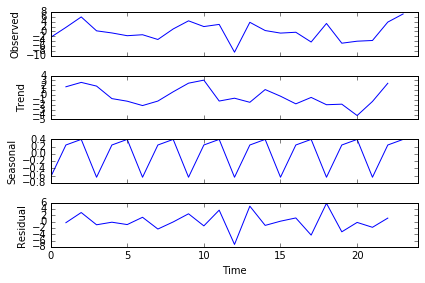

In [168]:
my_dow = my_dow.resample('W',how="mean")  

#print(my_dow.columns)
#print(type(my_dow))
#print(my_dow.shape)
#print(my_dow.describe())

#my_dow.plot(figsize=(10,10))
res = sm.tsa.seasonal_decompose(my_dow['percent_change_next_weeks_price'].values, freq=3)

resi = res.plot()

As it is time series relalted data we can see the attributes varying over time.So, later the data is analyzed for autocorrelation and partial corelation for one of its label which will be useful for further time series analysis.
Also trend analysis is an important part of time series data which helps us decrypt the trend,seasonality, residual componets of the data.
The seasonal decomposition module presents in statsmodels api of python helps us decompose our time series data into its different components.

The derived trend coefficients are below.

In [169]:
trend = res.trend
print (my_dow['percent_change_next_weeks_price'].values)
print (trend)
print(res.resid)
print(res.seasonal)

[-2.47066   1.63831   5.93325   0.230814 -0.632547 -1.76678  -1.36823
 -3.31725   1.00313   4.33455   1.98482   2.87026  -8.52713   3.72861
  0.354191 -0.694847 -0.34965  -4.35294   3.25815  -4.8416   -4.0201
 -3.72793   3.81731   7.16163 ]
[        nan  1.7003      2.60079133  1.843839   -0.72283767 -1.25585233
 -2.15075333 -1.22745     0.67347667  2.44083333  3.06321    -1.22401667
 -0.64275333 -1.481443    1.129318   -0.230102   -1.79914567 -0.48148
 -1.97879667 -1.86785    -4.19654333 -1.31024     2.41700333         nan]
[        nan -0.30471432  2.93653744 -0.97437946 -0.15243365 -0.90684889
  1.42116887 -2.33252432 -0.06626789  2.53236221 -1.32111432  3.69835544
 -7.24573113  4.96732868 -1.17104822  0.17390054  1.20677135 -4.26738122
  5.87559221 -3.21647432 -0.21947789 -1.77904446  1.15758235         nan]
[-0.63864554  0.24272432  0.39592122 -0.63864554  0.24272432  0.39592122
 -0.63864554  0.24272432  0.39592122 -0.63864554  0.24272432  0.39592122
 -0.63864554  0.24272432  0.39

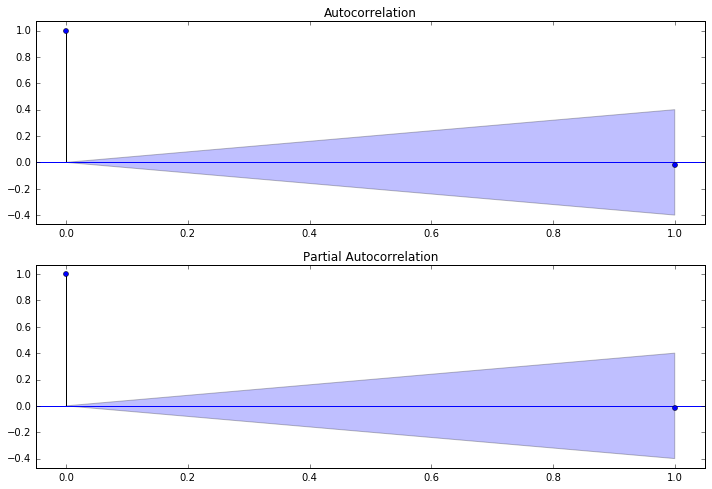

In [163]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(my_dow['percent_change_next_weeks_price'].values.squeeze(), lags=1, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(my_dow['percent_change_next_weeks_price'], lags=1, ax=ax2)

In [18]:
dow_gr = dow_df.groupby('stock')
dow_stock_AA = dow_gr.get_group('AA')
dow_stock_AA_data = dow_stock_AA[['percent_change_price', 'percent_change_volume_over_last_wk']]
print(dow_stock_AA_data.head())

print(dow_stock_AA_data)

   percent_change_price  percent_change_volume_over_last_wk
1             -4.428490                            1.380223
2             -2.470660                          -43.024959
3              1.638310                            9.355500
4              5.933250                            1.987452
5              0.230814                          -25.712195
     percent_change_price  percent_change_volume_over_last_wk
1               -4.428490                            1.380223
2               -2.470660                          -43.024959
3                1.638310                            9.355500
4                5.933250                            1.987452
5                0.230814                          -25.712195
6               -0.632547                          -30.226696
7               -1.766780                           66.177694
8               -1.368230                          -17.663150
9               -3.317250                            4.419900
10               1.0

In [4]:
# Convert labels from strings to boolean
label_encoder = preprocessing.LabelEncoder()
dow_labels = pd.DataFrame(label_encoder.fit_transform(dow_df.iloc[:,-3]))

In [6]:
print(dow_df.columns)

Index(['quarter', 'stock', 'date', 'open', 'high', 'low', 'close', 'volume',
       'percent_change_price', 'percent_change_volume_over_last_wk',
       'previous_weeks_volume', 'next_weeks_open', 'next_weeks_close',
       'percent_change_next_weeks_price', 'days_to_next_dividend',
       'percent_return_next_dividend'],
      dtype='object')


In [7]:
dow_data = dow_df[['open', 'high', 'low', 'close', 'volume', 'days_to_next_dividend']]

In [8]:
# Convert nominal attributes to encoded versions
attr_encoder = feature_extraction.DictVectorizer(sparse=False)
dow_data = pd.DataFrame(attr_encoder.fit_transform(dow_data.iloc[:,:].T.to_dict().values()))
dow_data.columns = attr_encoder.get_feature_names()

In [9]:
#normalize 
dow_data=pd.DataFrame(preprocessing.StandardScaler().fit_transform(dow_data.values))

In [66]:
km = cluster.KMeans(n_clusters=30, init='random', random_state=20160217)

In [90]:
print(dow_df.columns)

Index(['quarter', 'stock', 'date', 'open', 'high', 'low', 'close', 'volume',
       'percent_change_price', 'percent_change_volume_over_last_wk',
       'previous_weeks_volume', 'next_weeks_open', 'next_weeks_close',
       'percent_change_next_weeks_price', 'days_to_next_dividend',
       'percent_return_next_dividend'],
      dtype='object')


In [67]:
dow_clusterings = km.fit_predict(dow_data)

In [61]:
#dow_AA = dow_df[dow_df['stock']=='AA']
dow_gr = dow_df.groupby('stock')
dow_AA = dow_gr.get_group('AA')
dow_AA_data = dow_AA[['quarter', 'percent_change_price', 'percent_change_volume_over_last_wk', 'days_to_next_dividend', 'percent_return_next_dividend']]
dow_AA_target = dow_AA[['quarter', 'percent_change_next_weeks_price']]

##dow_AA_data=pd.DataFrame(preprocessing.StandardScaler().fit_transform(dow_AA_data.values))
print(dow_AA_target.iloc[12:14,:])
print(dow_AA_data.iloc[12:14,:])


     quarter  percent_change_next_weeks_price
361        2                                0
362        2                                1
     quarter  percent_change_price  percent_change_volume_over_last_wk  \
361        2               2.87026                           25.083748   
362        2              -8.52713                           64.860721   

     days_to_next_dividend  percent_return_next_dividend  
361                     34                      0.167411  
362                     27                      0.181598  


In [37]:
from collections import Counter
from sklearn.cross_validation import StratifiedKFold

def folds_to_split(data,targets,train,test):
    data_tr = pd.DataFrame(data).iloc[train]
    data_te = pd.DataFrame(data).iloc[test]
    labels_tr = pd.DataFrame(targets).iloc[train]
    labels_te = pd.DataFrame(targets).iloc[test]
    return [data_tr, data_te, labels_tr, labels_te]

#mhealth1_10stratified = StratifiedKFold(mhealth1_labels, n_folds=10,random_state=20160121, shuffle=True)
#print("com")

In [38]:
classifier = svm.SVC()

In [39]:
print(dow_AA_data.describe())

         quarter  percent_change_price  percent_change_volume_over_last_wk  \
count  24.000000             24.000000                           24.000000   
mean    1.541667             -0.472698                            4.032988   
std     0.508977              3.560926                           43.664644   
min     1.000000             -8.527130                          -59.994858   
25%     1.000000             -3.419920                          -25.961798   
50%     2.000000             -0.491098                            3.203676   
75%     2.000000              2.206180                           14.814421   
max     2.000000              5.933250                          147.769309   

       days_to_next_dividend  percent_return_next_dividend  
count              24.000000                     24.000000  
mean               49.375000                      0.182140  
std                27.787724                      0.008928  
min                 5.000000                      0.1

In [62]:
import time
x=time.time()
fold_results = pd.DataFrame()
foldnum=0
    
dow_tr_d = dow_AA_data[dow_AA_data['quarter']==1]
dow_tr_l = dow_AA_target[dow_AA_target['quarter']==1]

classifier.fit(dow_tr_d.iloc[:,1:], dow_tr_l.iloc[:,1:])

dow_te_l = dow_AA_target[dow_AA_target['quarter']==2]
dow_te_d = dow_AA_data[dow_AA_data['quarter']==2]
acc = classifier.score(dow_te_d.iloc[12:14,1:], dow_te_l.iloc[12:14,1:])

print ("Fold #%d -> Accuracy = %03.3f \t|| Support vector count= %s" % (foldnum, acc, classifier.n_support_))

fold_results.loc[foldnum, 'Accuracy'] = acc

print("\n Total time taken = ", int(time.time() - x), 's')
print(fold_results)

Fold #0 -> Accuracy = 1.000 	|| Support vector count= [5 6]

 Total time taken =  0 s
   Accuracy
0         1


/home/ankit/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


In [65]:
foldnum = 0
fold_results = pd.DataFrame()
dow_tr_d = dow_AA_data[dow_AA_data['quarter']==1]
dow_tr_l = dow_AA_target[dow_AA_target['quarter']==1]
dow_te_l = dow_AA_target[dow_AA_target['quarter']==2]
dow_te_d = dow_AA_data[dow_AA_data['quarter']==2]

lr = linear_model.LinearRegression()
lr.fit(dow_tr_d, dow_tr_l)
# We could print out our results
print ("Fold %d\t\t R^2 metric = %03.3f \t\t MSE = %03.1f " % (foldnum,  
                                                              lr.score(dow_te_d,dow_te_l), 
                                                              metrics.mean_squared_error(dow_te_l, 
                                                                                         lr.predict(dow_te_d))
                                                             ))
# But a nicer way to store them is in a DataFrame
fold_results.loc[foldnum, 'R^2'] = lr.score(dow_te_d, dow_te_l)
fold_results.loc[foldnum, 'MSE'] = metrics.mean_squared_error(dow_te_l, lr.predict(dow_te_d))

    
#Now let's look at the results:
print (fold_results)
#And compute the mean error across folds:
print (fold_results.mean())

Fold 0		 R^2 metric = -3.863 		 MSE = 1.1 
        R^2      MSE
0 -3.863339  1.10432
R^2   -3.863339
MSE    1.104320
dtype: float64
